<a href="https://colab.research.google.com/github/diegormsouza/jpss/blob/main/Flood_Map_Products_Python_DSouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Downloading and Overlaying a VIIRS/ABI Flood Map Product on an Interactive Map**

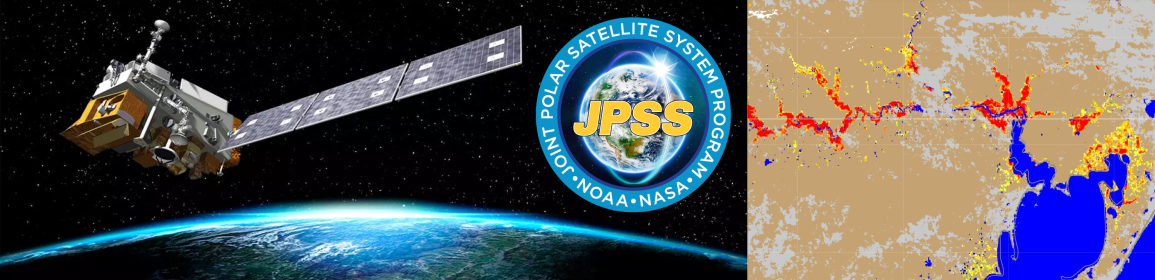

**Developed by:** Diego Souza (https://github.com/diegormsouza/)

**Note:** In this demonstration notebook we will download GeoTIFFs of the NOAA Global Floodmap Products and overlay them on an interactive map created with the Leafmap package (https://leafmap.org/)

**Latest update:** May 6th 2024

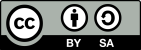

# **Step 1: Installing the Required Python Libraries**

In this step we will install the necessary Python libraries for this demonstration: **"requests"**, **"leafmap"**, **"xarray_leaflet"** and **"localtileserver"**.

In [ ]:
!pip install requests           # Allows you to send HTTP/1.1 requests extremely easily
!pip install leafmap            # Geospatial analysis and interactive mapping
!pip install xarray_leaflet     # Xarray extension for tiled map plotting.
!pip install localtileserver    # Local Tile Server for Geospatial Rasters
!pip install "ipywidgets>=7,<8" # Necessary, as seen here: https://github.com/googlecolab/colabtools/issues/3020

# **Step 2: Check Your Areas of Interest (AOI)**

The image below shows the Flood Mapping Products Areas of Interest. In the "aois" list you need to insert the desired AOIs (three digits each).

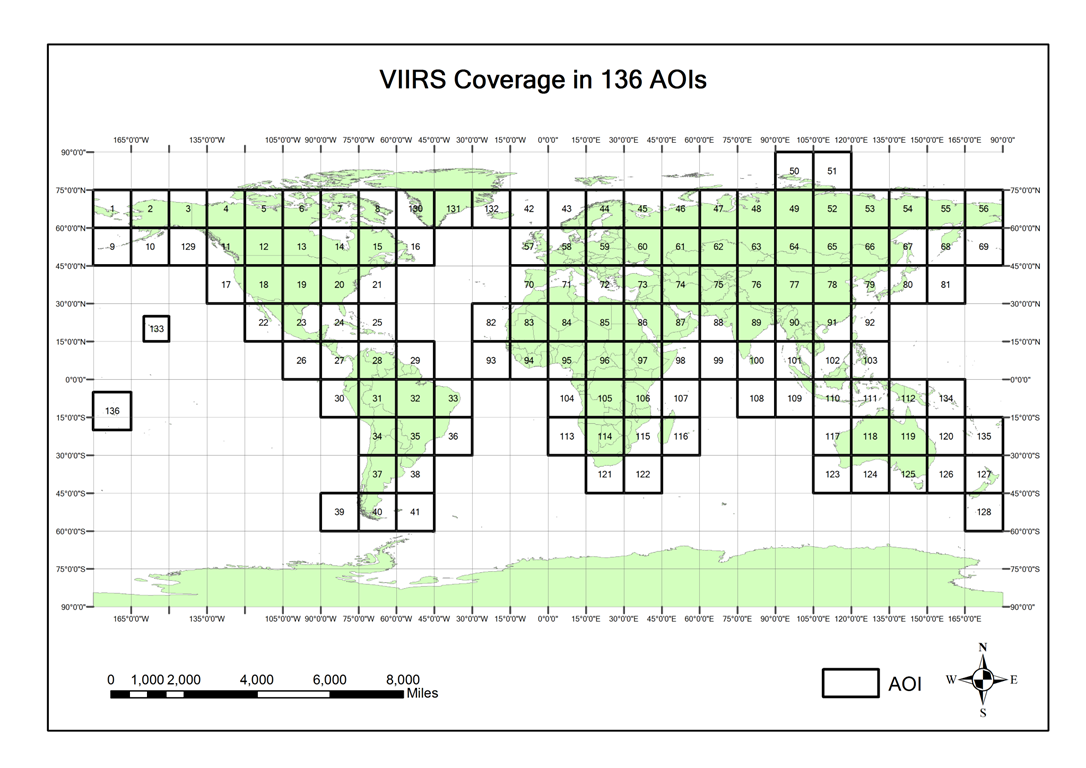

# **Step 3: Desired Datasets**

In this step you need to select the desired product, the date (last 10 days, in the 'YYYYMMDD' format) and the areas of interest (AOI).

In [ ]:
##################################
# POSSIBLE PRODUCTS (last 10 days)
##################################

# VIIRS Daily Composite (375 m)
# Product: RIVER-FLDglobal-composite1_

# VIIRS 5-Day Composite (375 m)
# Product: RIVER-FLDglobal-composite_

# ABI Daily Composite (1 km)
# Product: River-Flood-ABI_

# Joint VIIRS/ABI (1 km and 375 m)
# Product: RIVER-FLD-joint-ABI_

# Desired product
product = 'RIVER-FLDglobal-composite_'
# Desired date
date = '20240506'
# Desired areas of interest
aois = ['035', '038']

# **Step 4: Download the Flood Map GeoTIFFs and Create a Mosaic**

This step will download the GeoTIFFs for the desired AOIs for the selected date and mosaic the GeoTIFFs into a single file.

In [ ]:
# Delete previous files
!rm -rf /content/samples/*

# Required Libraries
import os                        # Miscellaneous operating system interfaces
import requests                  # HTTP library for Python
from bs4 import BeautifulSoup    # Pulling data out of HTML and XML files
import re                        # Regular expression operations
from osgeo import gdal, osr, ogr # A dummy placeholder for the gdal package
import glob                      # Unix style pathname pattern expansion

# Download directory
dir = "samples"; os.makedirs(dir, exist_ok=True)

# For each desired AOI
for aoi in aois:
  part = f'part{aoi}'                                      # Complement the aoi string
  url = f'https://floodlight.ssec.wisc.edu/composite/'     # HTTPS server
  result = requests.get(url)                               # Make the connection
  soup = BeautifulSoup(result.content, 'html.parser')      # Parse the HTML file
  tiffiles = soup.find_all('a', href=re.compile("\.tif$")) # Find all tif files in the server
  filenames = []                                           # Create the list
  for i in tiffiles:                                       # For each tif file
          filenames.append(i.extract().get_text())         # Add the file to filenames

  filenames = [x for x in filenames if date in x]          # Apply first filter: date
  filenames = [x for x in filenames if product in x]       # Apply second filter: product
  filenames = [x for x in filenames if part in x]          # Apply third filer: aoi

  # Download each file remaining on list after filtering
  for file in filenames:
    filename = file
    url = f'{url}{filename}'
    print("The following file will be downloaded: ", filename)
    # Sends a GET request to the specified url
    myfile = requests.get(url)
    # Download the GeoTIFF file
    open(f'{dir}/{filename}', 'wb').write(myfile.content)

# Mosaicking diferent files:
gdal.BuildVRT(f'{dir}/mosaic.vrt', sorted(glob.glob(f'{dir}/{product}*{date}*.tif'), key=os.path.getmtime))
gdal.Translate(f'{dir}/mosaic.tif',  f'{dir}/mosaic.vrt')

# File name:
tif_file = f'{dir}/mosaic.tif'

# **Step 6: Show the GeoTIFF on an Interactive Map**

In [ ]:
#import os                         # Miscellaneous operating system interfaces
import leafmap.leafmap as leafmap  # Geospatial analysis and interactive mapping

# Create an interactive map.
map = leafmap.Map(layer_control=True)

# Add some basemaps
map.add_basemap("TERRAIN")
map.add_basemap("ROADMAP")
map.add_basemap("SATELLITE")
map.add_basemap("HYBRID")

# Add a GeoTIFF raster to the map
map.add_raster(tif_file, layer_name='NOAA Global Flood Product')

# Add the layer controls
map.add_layer_control()
map.add("layer_manager")

# Add a text
text = f"NOAA Global Flood Product - {date[0:4]}-{date[4:6]}-{date[6:8]}"
map.add_text(text, position="bottomright")

# Show the map
map

# **Downloading and Overlaying a VIIRS/ABI Flood Map Product on an Interactive Map**

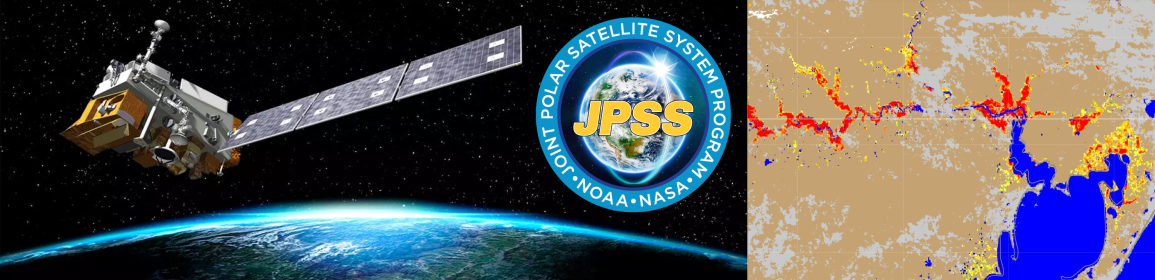

**Developed by:** Diego Souza (https://github.com/diegormsouza/)

**Note:** In this demonstration notebook we will download GeoTIFFs of the NOAA Global Floodmap Products and overlay them on an interactive map created with the Leafmap package (https://leafmap.org/)

**Latest update:** May 6th 2024

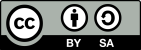